Write a function that calculates the values of MA(q) model. The function must have a parameter burnin that
determines how many initial values are discarded.


In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


def NextValue(p,prev_values):
    sum=0
    for i in np.arange(p):
        sum+=phis[i]*prev_values[len(prev_values)-p+i]
    noise=np.random.randn()  
    return c+sum+noise, noise
 
def MA(p,c,phis):
    MAvalues=start_numbers
    noises=start_noises
    for i in np.arange(simulation_length):
        res=NextValue(p,noises)
        MAvalues.append(res[0])
        noises.append(res[1])
    del MAvalues[0:burnin]
    return MAvalues

Calculate n = 5000 values of MA(1) model yt = 20 + ϵt + 0.8ϵt−1.

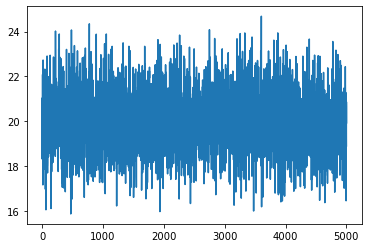

In [3]:
p=1
c=20
phis=[0.8]
burnin=300
start_numbers=[1,2,3]
start_noises=[np.random.randn() for i in range(3)]
simulation_length=5300



result=MA(p,c,phis)
plt.plot(pd.Series(result))




Calculate the autocorrelation (ACF) and partial autocorrelation (PACF) function for this time series


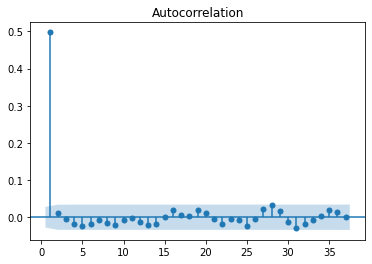

In [4]:
plot_acf(pd.Series(result), zero=False);

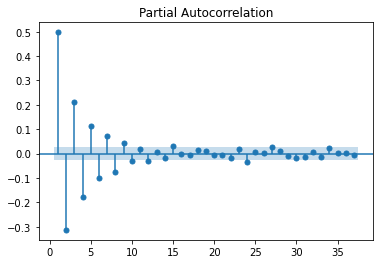

In [5]:
plot_pacf(pd.Series(result), zero=False);

 Repeat the calculations for MA(2) model yt = ϵt − ϵt−1 + 0.8ϵt−2.

In [6]:
p=2
c=0
phis=[0.8,-1]
burnin=300
start_numbers=[1,2,3]
start_noises=[np.random.randn() for i in range(3)]
simulation_length=5300

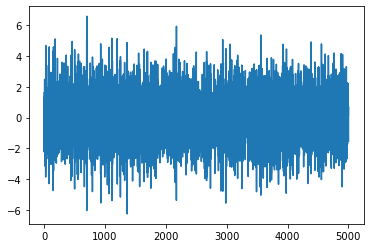

In [7]:
result=MA(p,c,phis)
plt.plot(pd.Series(result))

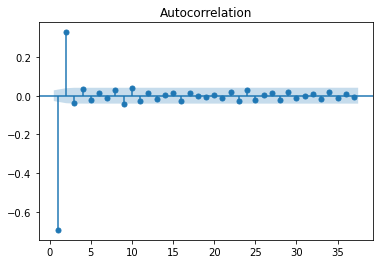

In [8]:
plot_acf(pd.Series(result), zero=False);

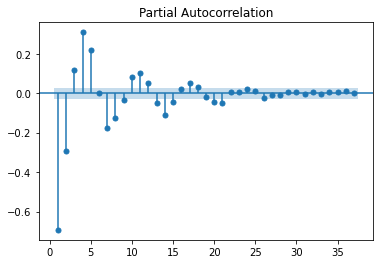

In [9]:
plot_pacf(pd.Series(result), zero=False);

We can see that comparing to AR models, this time autocorrealation values degrade much faster.  High values are visible only for lag less or equal model parameter q.